## Simple returns and log returns

In [151]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
df = pd.DataFrame(index=[2016, 2017, 2018], data = [100, 50, 95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [153]:
simplereturns = df.pct_change().dropna()
simplereturns

,Price
2017,-0.5
2018,0.9


In [154]:
simplereturns.mean()

Price    0.2
dtype: float64

### Mean returns are misleading as crazy

In [155]:
logreturns = np.log(df/df.shift(1)).dropna()
logreturns

,Price
2017,-0.693147
2018,0.641854


In [156]:
logreturns.mean()

Price   -0.025647
dtype: float64

In [157]:
100*np.exp(logreturns.mean()*2)

Price    95.0
dtype: float64

In [158]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [159]:
spy = SPY.Close
spy

Date
1993-01-29     43.937500
1993-02-01     44.250000
1993-02-02     44.343750
1993-02-03     44.812500
1993-02-04     45.000000
                 ...    
2023-02-17    407.260010
2023-02-21    399.089996
2023-02-22    398.540009
2023-02-23    400.660004
2023-02-24    396.380005
Name: Close, Length: 7573, dtype: float64

In [160]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-17,407.260010
2023-02-21,399.089996
2023-02-22,398.540009


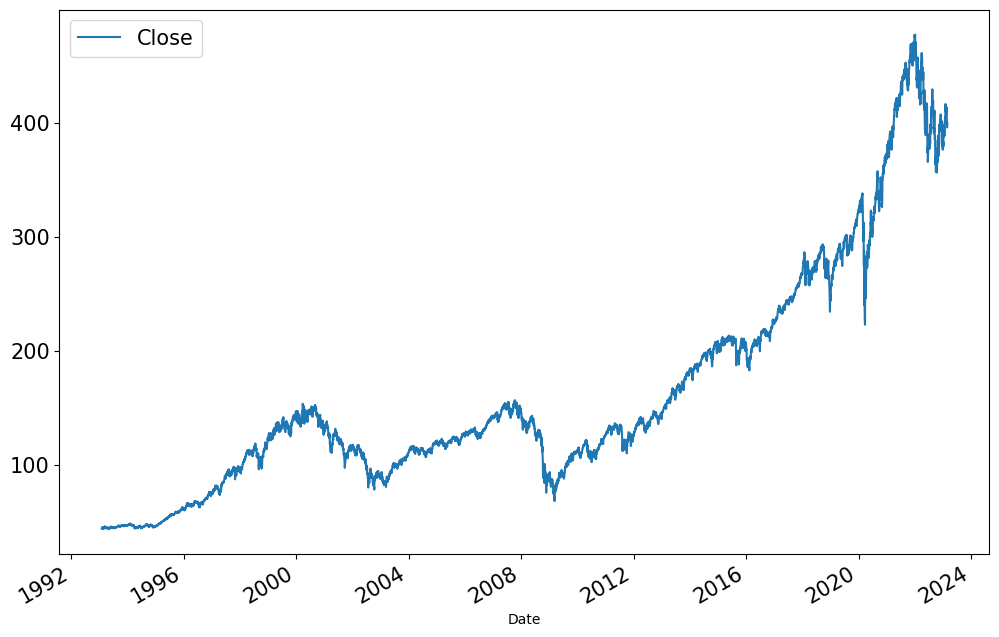

In [161]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [162]:
spy_roll = spy.rolling(window=10)
spy_roll

Rolling [window=10,center=False,axis=0,method=single]

In [163]:
spy_roll = spy_roll.mean()
spy_roll.head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [164]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-17,410.239990
2023-02-21,409.464996
2023-02-22,408.160004


In [165]:
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-17,415.190002
2023-02-21,415.190002
2023-02-22,413.980011


In [166]:
spy.rolling(window=10, min_periods=5).min().head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,43.93750
1993-02-05,43.93750
1993-02-08,43.93750
1993-02-09,43.93750
1993-02-10,43.93750


In [167]:
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-17,407.260010
2023-02-21,399.089996
2023-02-22,398.540009


In [168]:
spy["SMA50"] = spy.rolling(window=50,min_periods=50).mean()
spy

,Close,SMA50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2023-02-17,407.260010,396.5978
2023-02-21,399.089996,396.7164
2023-02-22,398.540009,396.7624


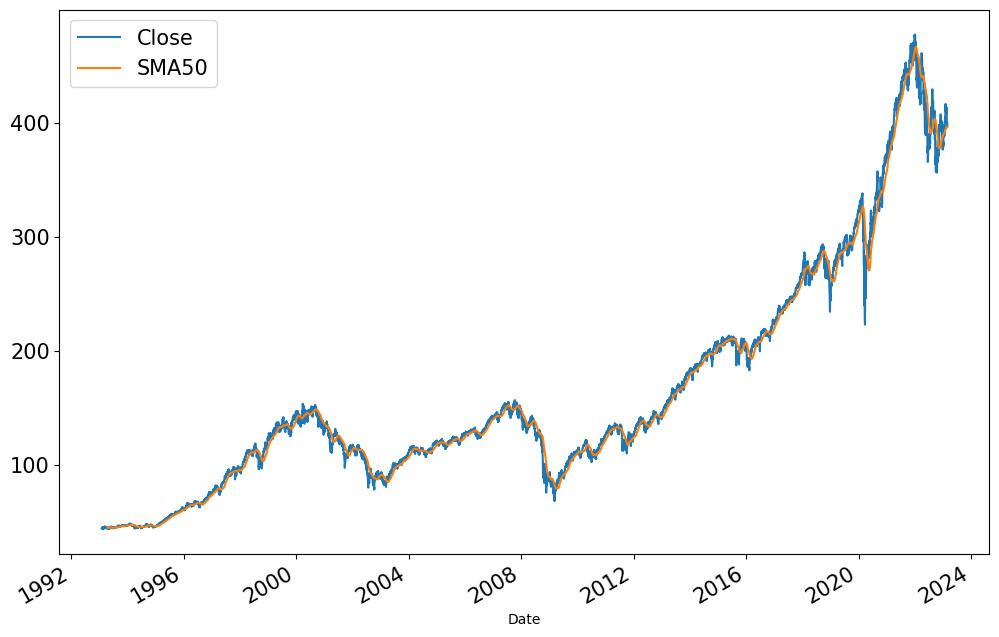

In [169]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [170]:
spy["SMA200"] = spy.Close.rolling(window=200,min_periods=200).mean()
spy

,Close,SMA50,SMA200
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2023-02-17,407.260010,396.5978,393.40895
2023-02-21,399.089996,396.7164,393.25910
2023-02-22,398.540009,396.7624,393.18275


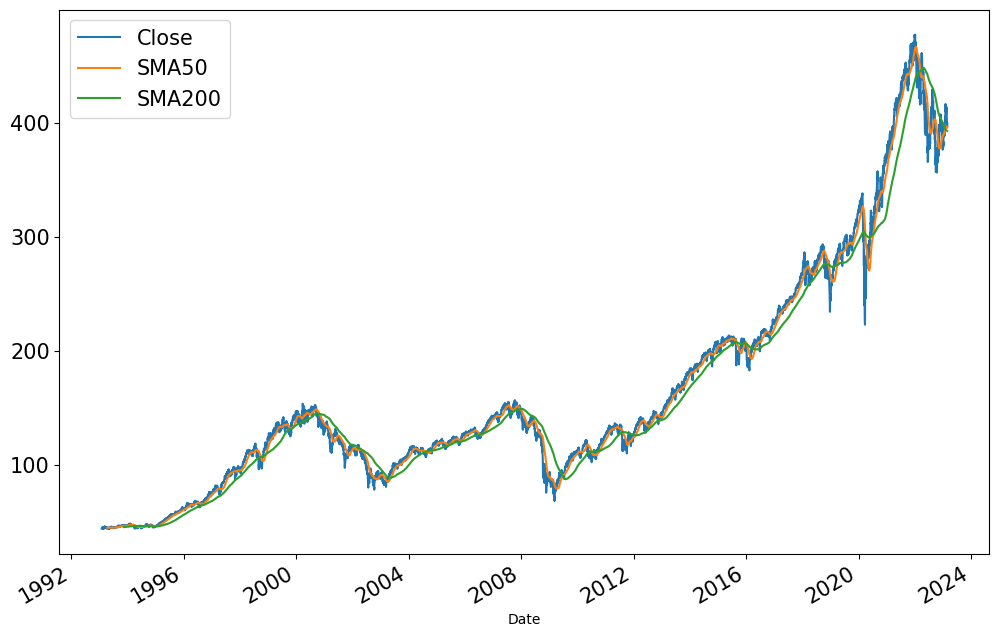

In [171]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()